# cancer TRAIN

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## preprocess the data

In [26]:



# //Data Preprocessing
# Training Image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
 r"D:\01 STUDY MATERIAL\ai project\BreaKHis_v1\histology_slides\breast",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=4,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = training_set.class_names
print(class_name)

Found 7909 files belonging to 2 classes.
['benign', 'malignant']



### Validation Image Preprocessing

In [27]:

validation_set = tf.keras.utils.image_dataset_from_directory(
  r"D:\01 STUDY MATERIAL\ai project\BreaKHis_v1\histology_slides\breast",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=4,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 7909 files belonging to 2 classes.
['benign', 'malignant']


# Building Model

In [28]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layer

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [33]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [34]:
cnn.add(tf.keras.layers.Flatten())

In [35]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [36]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [37]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=2,activation='sigmoid'))

## Compiling and Training Phase

In [38]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [40]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1978/1978 [==============================] - 32s 15ms/step - loss: 0.4810 - accuracy: 0.8074 - val_loss: 0.4716 - val_accuracy: 0.8239
Epoch 2/10
1978/1978 [==============================] - 30s 15ms/step - loss: 0.3975 - accuracy: 0.8456 - val_loss: 0.3635 - val_accuracy: 0.8699
Epoch 3/10
1978/1978 [==============================] - 30s 15ms/step - loss: 0.3601 - accuracy: 0.8605 - val_loss: 0.3104 - val_accuracy: 0.8799
Epoch 4/10
1978/1978 [==============================] - 30s 15ms/step - loss: 0.3246 - accuracy: 0.8733 - val_loss: 0.2840 - val_accuracy: 0.8903
Epoch 5/10
1978/1978 [==============================] - 31s 16ms/step - loss: 0.2988 - accuracy: 0.8841 - val_loss: 0.2515 - val_accuracy: 0.8948
Epoch 6/10
1978/1978 [==============================] - 31s 16ms/step - loss: 0.2696 - accuracy: 0.8905 - val_loss: 0.2381 - val_accuracy: 0.9085
Epoch 7/10
1978/1978 [==============================] - 31s 16ms/step - loss: 0.2488 - accuracy: 0.8987 - val_loss: 0.1763 -

# Evaluating Model

In [41]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

1978/1978 [==============================] - 9s 5ms/step - loss: 0.1893 - accuracy: 0.9294
Training accuracy: 0.9294474720954895


In [42]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

1978/1978 [==============================] - 9s 5ms/step - loss: 0.1893 - accuracy: 0.9294
Validation accuracy: 0.9294474720954895


In [29]:
cnn.save('trnew_cancer_model.keras')

In [43]:
training_history.history

{'loss': [0.48102250695228577,
  0.3974965214729309,
  0.36008554697036743,
  0.32455429434776306,
  0.2987501323223114,
  0.2695866525173187,
  0.24880869686603546,
  0.223423033952713,
  0.19623057544231415,
  0.16829277575016022],
 'accuracy': [0.8074345588684082,
  0.8456189036369324,
  0.8605386018753052,
  0.8733088970184326,
  0.8840561509132385,
  0.8905044794082642,
  0.8987229466438293,
  0.9078265428543091,
  0.9213554263114929,
  0.931217610836029],
 'val_loss': [0.471640944480896,
  0.36345726251602173,
  0.31043949723243713,
  0.2840055227279663,
  0.25151827931404114,
  0.2380870282649994,
  0.17634831368923187,
  0.17730870842933655,
  0.15145282447338104,
  0.1893375664949417],
 'val_accuracy': [0.8238715529441833,
  0.8698950409889221,
  0.8798837065696716,
  0.890251636505127,
  0.8948034048080444,
  0.9084587097167969,
  0.9271715879440308,
  0.926286518573761,
  0.9408268928527832,
  0.9294474720954895]}

In [44]:
import json
with open('training_hist_cancer.json','w') as f:
  json.dump(training_history.history,f)

In [45]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## ACCUracy visual

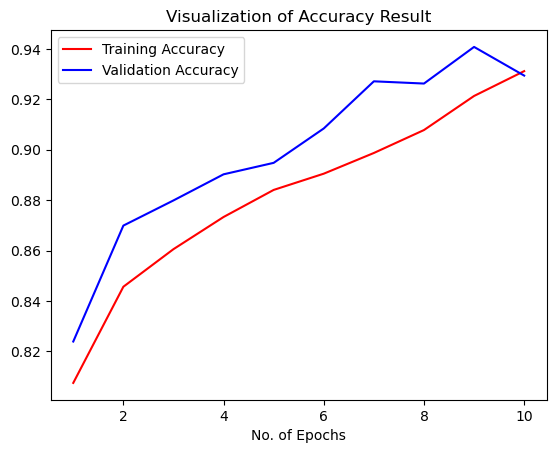

In [46]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [47]:
class_name = validation_set.class_names

In [49]:
test_set = tf.keras.utils.image_dataset_from_directory(
   r"D:\01 STUDY MATERIAL\ai project",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 47454 files belonging to 2 classes.


In [50]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

47454/47454 [==============================] - 125s 3ms/step


In [51]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [52]:
Y_true

<tf.Tensor: shape=(47454,), dtype=int64, numpy=array([0, 0, 0, ..., 1, 1, 1], dtype=int64)>

In [53]:
predicted_categories

<tf.Tensor: shape=(47454,), dtype=int64, numpy=array([0, 0, 0, ..., 1, 1, 1], dtype=int64)>

In [54]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [55]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

      benign       0.17      0.28      0.21      7909
   malignant       0.83      0.72      0.77     39545

    accuracy                           0.65     47454
   macro avg       0.50      0.50      0.49     47454
weighted avg       0.72      0.65      0.68     47454



## Confusion Matrix Visualization

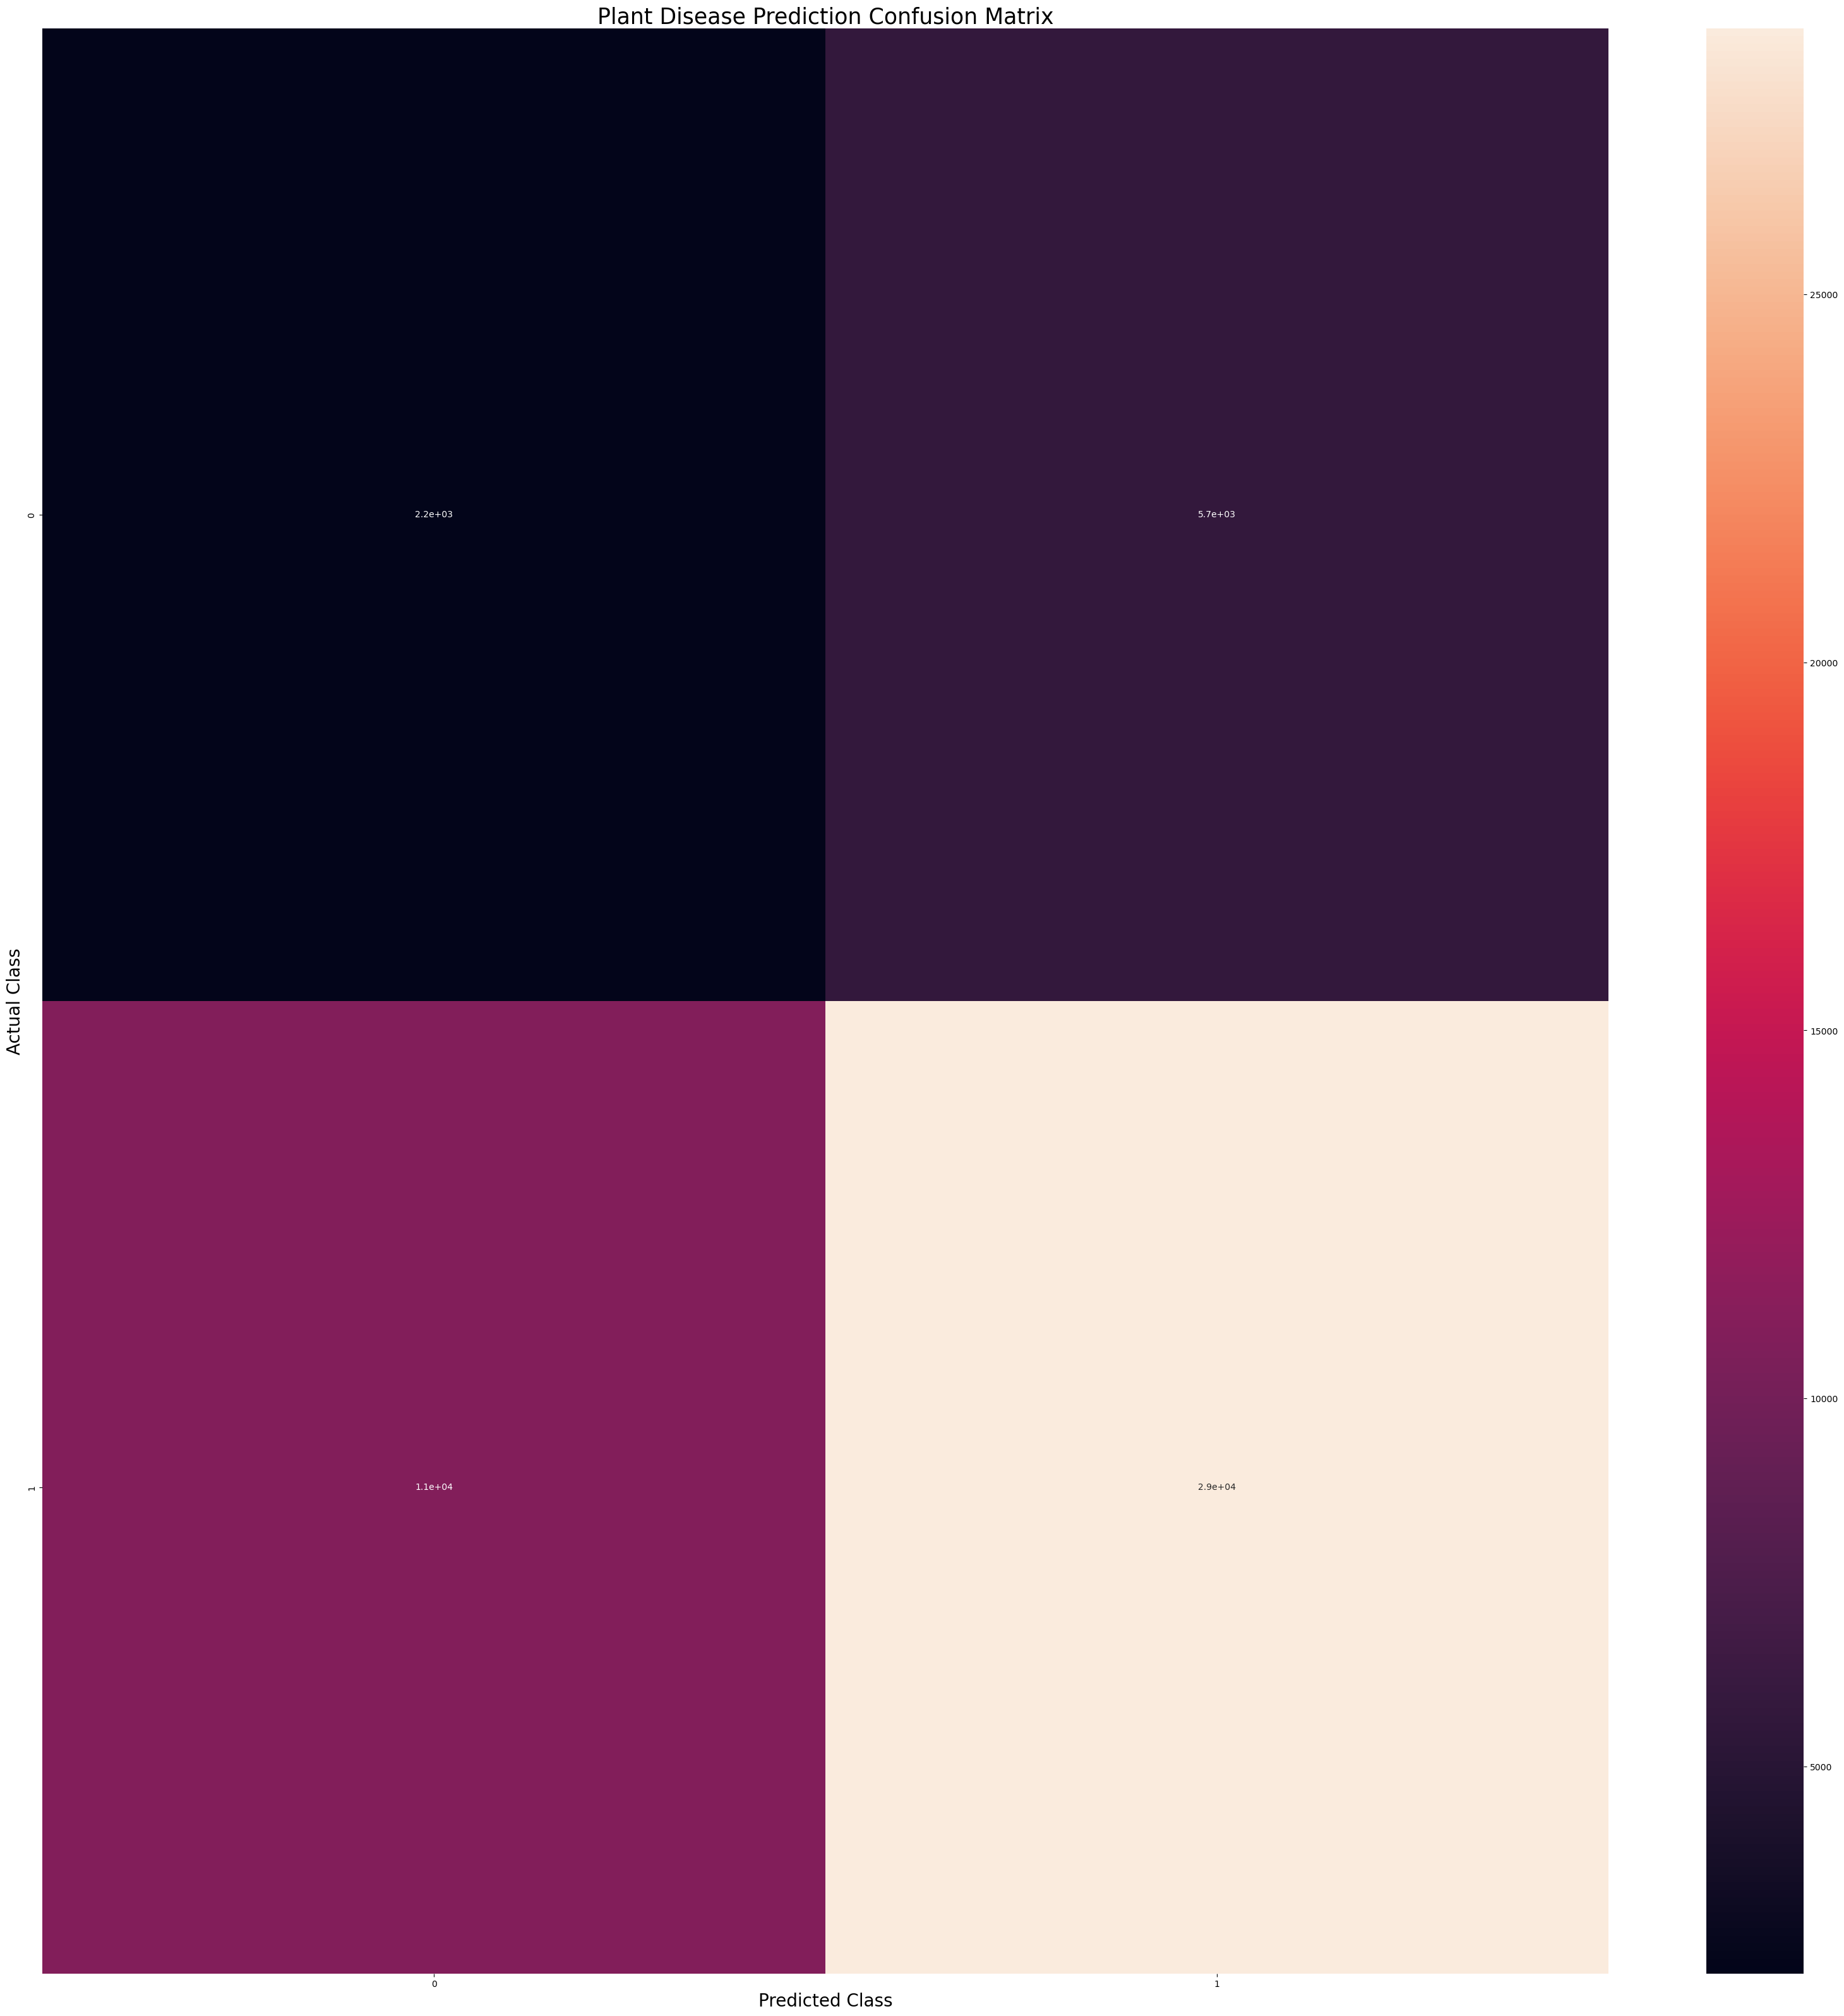

In [56]:
import seaborn as sns
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()